In [2]:
import pandas as pd
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [3]:
img_gray = cv2.imread("COVID-1.png", cv2.IMREAD_GRAYSCALE) 

In [4]:
print('le type de img_gray est :', type(img_gray))

le type de img_gray est : <class 'numpy.ndarray'>


In [5]:
print('dimension de img_gray :', img_gray.shape)

dimension de img_gray : (299, 299)


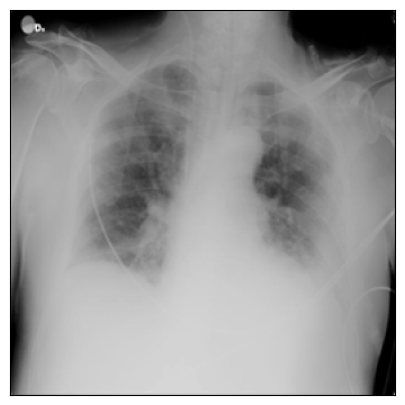

In [6]:
plt.figure(figsize = (8,5))

plt.imshow(img_gray, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show();

In [7]:
# Charger l'image du poumon et le masque
lung_image = cv2.imread('COVID-1.png', cv2.IMREAD_COLOR)
mask_image = cv2.imread('COVID-m1.png', cv2.IMREAD_GRAYSCALE)

In [8]:
print('dimension de img_gray :', mask_image.shape)

dimension de img_gray : (256, 256)


In [9]:
# On redimensionne le masque pour qu'il corresponde à la taille de l'image du poumon

mask_image = cv2.resize(mask_image, (lung_image.shape[1], lung_image.shape[0]))

In [10]:
# On pplique une couleur au masque 

colored_mask = cv2.applyColorMap(mask_image, cv2.COLORMAP_JET)

In [11]:
# On mélange l'image d'origine et le masque coloré

alpha = 0.5  # Transparence du masque
overlay_image = cv2.addWeighted(colored_mask, alpha, lung_image, 1 - alpha, 0)

In [12]:
#On affiche les images

cv2.imshow('Lung Image', lung_image)
cv2.imshow('Mask Image', mask_image)
cv2.imshow('Overlay Image', overlay_image)

In [ ]:
cv2.waitKey(0)

In [ ]:
cv2.destroyAllWindows()

In [ ]:
#Cette observation permet de constater si les poumons et les masques sont correctement alignés 
#et permet de mieux cibler les régions d'intérets 
#Cette meilleure visualisation permet également d'identifier les anomalies plus facilement
#ce qui rend les données plus compréhensibles.

In [11]:
lung_gray = cv2.imread('Lung_Opacity-5.png', cv2.IMREAD_GRAYSCALE)
lung_gray = cv2.resize(spider_gray, (150,150))
lung_gray = 255 - lung_gray

In [12]:
filtre = cv2.GaussianBlur(lung_gray, ksize = (3,3), sigmaX = 0)
fig = plt.figure(figsize = (12,12))

<Figure size 1200x1200 with 0 Axes>

([], [])

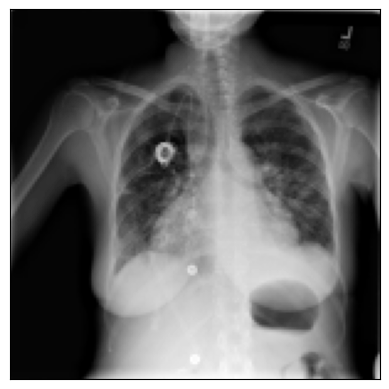

In [13]:
fig.add_subplot(1,4,1)

plt.imshow(lung_gray, cmap = 'gray')
plt.xticks([])
plt.yticks([])

In [14]:
fig.add_subplot(1,4,2)

kernel_1 = np.ones((3,3),np.uint8)
erosion_1 = cv2.erode(filtre, kernel_1)

([], [])

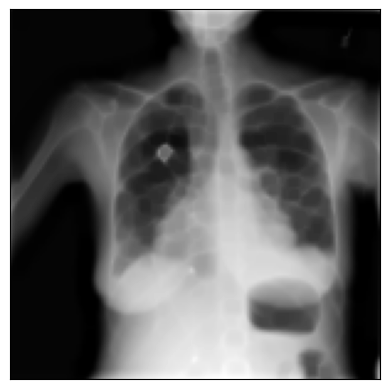

In [15]:
plt.imshow(erosion_1, cmap = 'gray')
plt.xticks([])
plt.yticks([])

([], [])

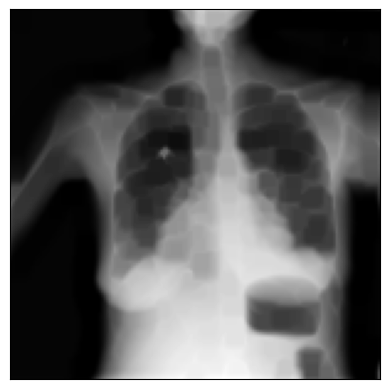

In [16]:
fig.add_subplot(1,4,3)

kernel_2 = np.ones((5,5),np.uint8)
erosion_2 = cv2.erode(filtre, kernel_2)

plt.imshow(erosion_2, cmap = 'gray')
plt.xticks([])
plt.yticks([])

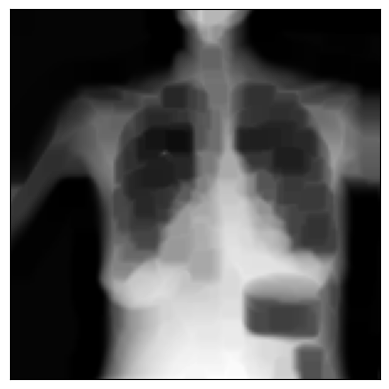

In [17]:
fig.add_subplot(1,4,4)

kernel_3 = np.ones((7,7),np.uint8)
erosion_3 = cv2.erode(filtre, kernel_3)

plt.imshow(erosion_3, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show();

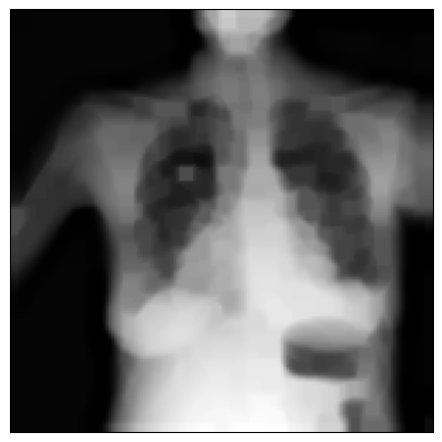

In [18]:
fig = plt.figure(figsize = (12,12))

fig.add_subplot(1,2,1)

kernel = np.ones((5,5),np.uint8)
dilatation = cv2.dilate(erosion_3,kernel)

plt.imshow(dilatation, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show();

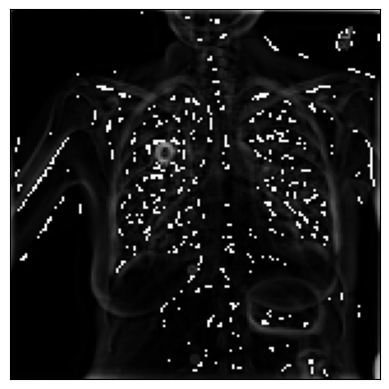

In [20]:
diff = lung_gray - dilatation

plt.imshow(diff, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show();

In [ ]:
#Ces techniques de transformations morphologiques permettent de détecter ou d'isoler 
#des structures pertinentes au sein d'une image.